# IMPORTANTION DES PACKAGES NECESSAIRE


In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
documents_administratifs_ext = pd.read_csv("E:/LES STAGES/Demandes de stages/TOGO DATA LAB/test_analyste/Base/documents_administratifs_ext.csv")
donnees_socioeconomiques = pd.read_csv("E:/LES STAGES/Demandes de stages/TOGO DATA LAB/test_analyste/Base/donnees_socioeconomiques.csv")
demandes_service_public = pd.read_csv("E:/LES STAGES/Demandes de stages/TOGO DATA LAB/test_analyste/Base/demandes_service_public.csv")
reseau_routier_togo_ext = pd.read_csv("E:/LES STAGES/Demandes de stages/TOGO DATA LAB/test_analyste/Base/reseau_routier_togo_ext.csv")
details_communes = pd.read_csv("E:/LES STAGES/Demandes de stages/TOGO DATA LAB/test_analyste/Base/details_communes.csv")
developpement = pd.read_csv("E:/LES STAGES/Demandes de stages/TOGO DATA LAB/test_analyste/Base/developpement.csv")
centres_service = pd.read_csv("E:/LES STAGES/Demandes de stages/TOGO DATA LAB/test_analyste/Base/centres_service.csv")
logs_activite = pd.read_csv("E:/LES STAGES/Demandes de stages/TOGO DATA LAB/test_analyste/Base/logs_activite.csv")

In [27]:
demandes_service_public.head(1)

,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur
0,D001,Centrale,Sotouboua,Sotouboua,Nyékonakpoé,Carte d'identité,Identité,168,1,0.0,2023-09-30,Perte,Rejetée,En ligne,27,M


In [26]:
centres_service.head(1)

,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
0,CT001,Centre Principal Dapaong,Principal,Savanes,Tône,Dapaong,Administratif,10.592,0.4742,300,12,07:30-17:30,Non,Complet,2016-02-14,Actif


In [345]:
bases_names = ["centres_service", "demandes_service_public", "details_communes", "developpement",
              "documents_administratifs_ext", "donnees_socioeconomiques", "logs_activite", "reseau_routier_togo_ext"]
bases = [centres_service, demandes_service_public, details_communes, developpement,
              documents_administratifs_ext, donnees_socioeconomiques, logs_activite, reseau_routier_togo_ext]

# Analyse Exploratoire des Données (EDA)


In [ ]:
# Description des données:
# Cette fonction va renvoyer les dimensions de chaque base de données ainsi que le type de ses variables
def description_donnees():
    for i in range(len(bases_names)):
        print(f"La base {bases_names[i]} possède {bases[i].shape[0]} observations (lignes) et\n {bases[i].shape[1]} variables (colonnes)\n")
        print(f"Les types de variable de la base {bases_names[i]} se presentete comme suit:\n {bases[i].dtypes}")

In [ ]:
description_donnees()

La base centres_service possède 55 observations (lignes) et
 16 variables (colonnes)

Les types de variable de la base centres_service se presentete comme suit:
 centre_id                   object
nom_centre                  object
type_centre                 object
region                      object
prefecture                  object
commune                     object
quartier                    object
latitude                   float64
longitude                  float64
personnel_capacite_jour      int64
nombre_guichets              int64
heures_ouverture            object
horaire_nuit                object
equipement_numerique        object
date_ouverture              object
statut_centre               object
dtype: object
La base demandes_service_public possède 600 observations (lignes) et
 16 variables (colonnes)

Les types de variable de la base demandes_service_public se presentete comme suit:
 demande_id                 object
region                     object
prefecture       

In [348]:
# Identification des valeurs manquantes:
def Identification_valeurs_manquantes():
    for i in range(len(bases_names)):
        print(f"Les valeurs manquantes de la base {bases_names[i]} se presentent comme suit:\n {bases[i].isnull().sum()}\n")

In [349]:
Identification_valeurs_manquantes()

Les valeurs manquantes de la base centres_service se presentent comme suit:
 centre_id                  0
nom_centre                 0
type_centre                0
region                     0
prefecture                 0
commune                    0
quartier                   0
latitude                   0
longitude                  0
personnel_capacite_jour    0
nombre_guichets            0
heures_ouverture           0
horaire_nuit               0
equipement_numerique       0
date_ouverture             0
statut_centre              0
dtype: int64

Les valeurs manquantes de la base demandes_service_public se presentent comme suit:
 demande_id                0
region                    0
prefecture                0
commune                   0
quartier                  0
type_document             0
categorie_document        0
nombre_demandes           0
delai_traitement_jours    0
taux_rejet                0
date_demande              0
motif_demande             0
statut_demande          

In [ ]:
# la base: logs_activite contient des données manquantes (80 pour la variable type_document et 103 pour la variable raison_rejet)

In [351]:
# Identification des valeurs aberrantes: 
# Approche 1: InterQuartileRange
def Identification_valeurs_aberrantes_IQR(donnee, colonne):
    """ Cette fonction prend le nom de la base et une variable quantitative et retourner les valeurs aberrantes pour la colonnes"""
    Q1 = donnee[colonne].quantile(0.25)
    Q3 = donnee[colonne].quantile(0.75)
    IQR = Q3 - Q1

    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    
    mask = (donnee[colonne] < borne_inf) | (donnee[colonne] > borne_sup)
    outliers = donnee[mask]
    nombre_outliers = len(donnee[mask])
    print(f"La varialble {colonne} contient {nombre_outliers} number of outliers")
    if nombre_outliers!=0:
        print(outliers)


# @ Approche 2: Z_score
def Identification_valeurs_aberrantes_Z_score(donnee, colonne, seuil=2):
    """ Cette fonction prend le nom de la base, une variable quantitative ainsi que le seuil (par defaut on maintient 2*) et ratourne les 
    valeurs aberrantes"""
    z_scores = np.abs(stats.zscore(donnee[colonne]))
    mask = z_scores > seuil
    outliers = donnee[mask]
    nombre_outliers = len(donnee[mask])
    print(f"La varialble {colonne} contient {nombre_outliers} number of outliers\n")
    if nombre_outliers!=0:
        print(outliers)

In [352]:
demandes_service_public.head(1)

,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur
0,D001,Centrale,Sotouboua,Sotouboua,Nyékonakpoé,Carte d'identité,Identité,168,1,0.0,2023-09-30,Perte,Rejetée,En ligne,27,M


In [353]:
# volume de demande: Les deux approches donnent les memes resultats
Identification_valeurs_aberrantes_Z_score(demandes_service_public, "nombre_demandes")

La varialble nombre_demandes contient 0 number of outliers



In [354]:
# delai de traitement: Les deux approches donnent les memes resultats
Identification_valeurs_aberrantes_IQR(demandes_service_public, "delai_traitement_jours")

La varialble delai_traitement_jours contient 0 number of outliers


In [355]:
logs_activite.head(1)

,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin
0,LOG001,CT015,2023-10-30,Traitement,Carte d'identité,241,41,31,Non éligible,15,58,Non,08:00,16:00


In [356]:
# Delai effectif: Les deux approches donnent les memes resultats
Identification_valeurs_aberrantes_Z_score(logs_activite, "delai_effectif")

La varialble delai_effectif contient 0 number of outliers



In [357]:
# personnel present: Les deux approches donnent les memes resultats
Identification_valeurs_aberrantes_Z_score(logs_activite, "personnel_present")

La varialble personnel_present contient 0 number of outliers



In [358]:
centres_service.head(1)

,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
0,CT001,Centre Principal Dapaong,Principal,Savanes,Tône,Dapaong,Administratif,10.592,0.4742,300,12,07:30-17:30,Non,Complet,2016-02-14,Actif


In [359]:
# personnel capacité par jour: Les deux résultats ne sont pas identique
Identification_valeurs_aberrantes_Z_score(centres_service, "personnel_capacite_jour")

La varialble personnel_capacite_jour contient 5 number of outliers

   centre_id                nom_centre type_centre    region prefecture  \
5      CT006   Centre Principal Tsévié   Principal  Maritime        Zio   
7      CT008  Centre Principal Kpalimé   Principal  Plateaux      Kloto   
25     CT026   Centre Principal Sokodé   Principal  Centrale  Tchaoudjo   
28     CT029   Centre Principal Sokodé   Principal  Centrale  Tchaoudjo   
36     CT037     Centre Principal Lomé   Principal  Maritime      Golfe   

    commune           quartier  latitude  longitude  personnel_capacite_jour  \
5    Tsévié             Marché    6.4705     1.4344                      338   
7   Kpalimé         Préfecture    7.6305     0.9746                      355   
25   Sokodé        Résidentiel    8.9819     0.8310                      345   
28   Sokodé  Zone industrielle    8.8760     1.2030                      358   
36     Lomé              Poste    6.6032     1.3270                      324   



In [360]:
# Identification des doublons: Cette fonctions va retourner le nombre total de doublons dans chanque base de donnees
def Identification_des_doublons():
    for i in range(len(bases_names)):
        print(f"La Base {bases_names[i]} contient {bases[i].duplicated().sum()} doublons")

In [361]:
Identification_des_doublons()

La Base centres_service contient 0 doublons
La Base demandes_service_public contient 0 doublons
La Base details_communes contient 0 doublons
La Base developpement contient 0 doublons
La Base documents_administratifs_ext contient 0 doublons
La Base donnees_socioeconomiques contient 0 doublons
La Base logs_activite contient 0 doublons
La Base reseau_routier_togo_ext contient 0 doublons


In [362]:
demandes_service_public.head(2)

,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur
0,D001,Centrale,Sotouboua,Sotouboua,Nyékonakpoé,Carte d'identité,Identité,168,1,0.00,2023-09-30,Perte,Rejetée,En ligne,27,M
1,D002,Kara,Binah,Pagouda,Hôpital,Carte d'identité,Identité,17,22,0.09,2023-12-22,Vol,Traitee,En ligne,21,F


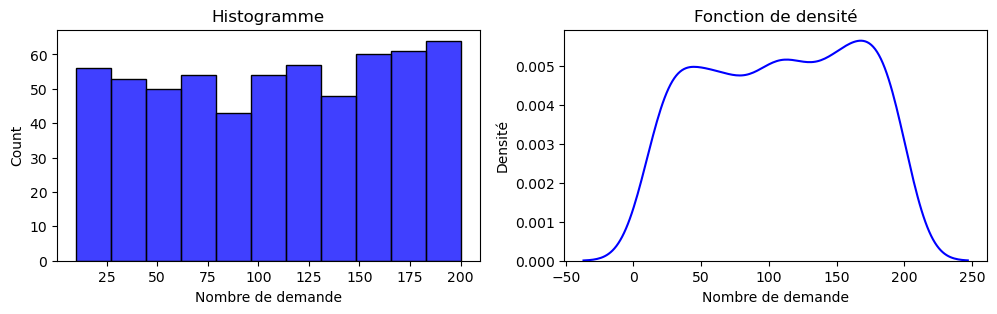

In [363]:
# ANALYSE DESPRINCIPALES DISTRIBUTIONS:
# @ Volume de demande
# Histogramme 
plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
sns.histplot(demandes_service_public["nombre_demandes"], color="blue")
plt.xlabel("Nombre de demande")
plt.ylabel("Count")
plt.title("Histogramme")

# KDE
plt.subplot(1,2,2)
sns.kdeplot(demandes_service_public["nombre_demandes"], color="blue")
plt.xlabel("Nombre de demande")
plt.ylabel("Densité")
plt.title("Fonction de densité")
plt.show()

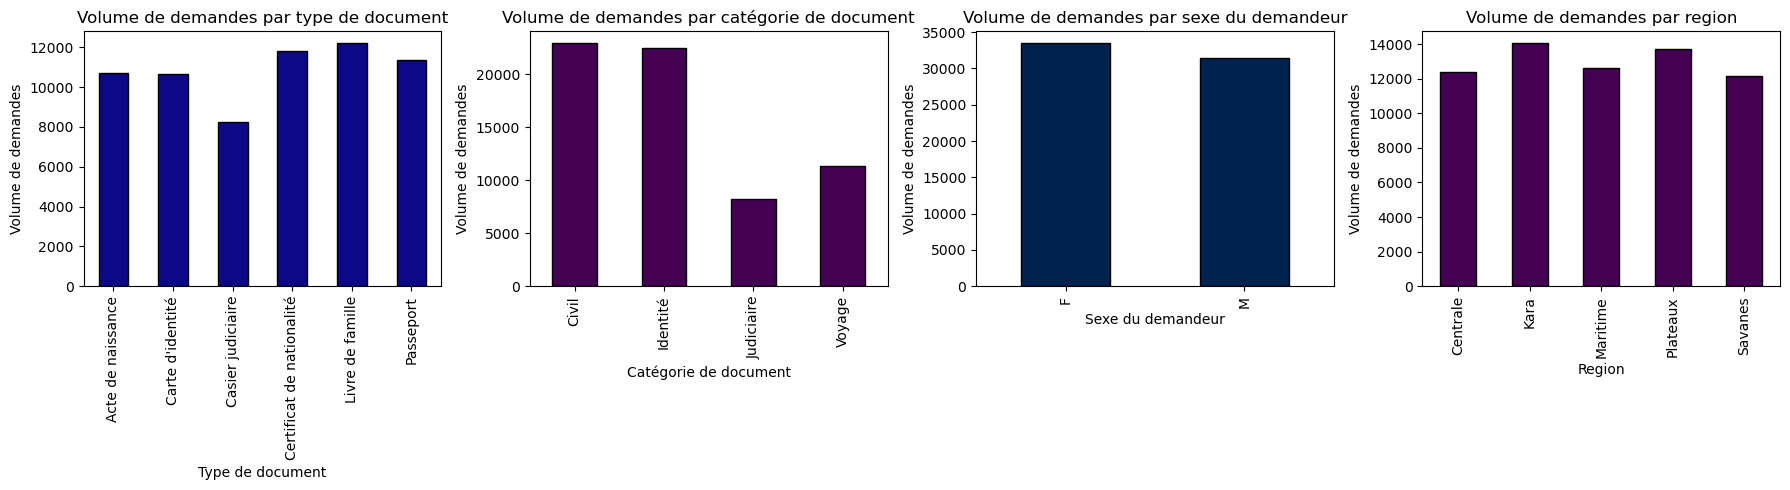

In [364]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 4, 1)
demandes_service_public.groupby("type_document")["nombre_demandes"].sum().plot(kind="bar", colormap="plasma", edgecolor="black")
plt.xlabel("Type de document")
plt.ylabel("Volume de demandes")
plt.title("Volume de demandes par type de document")

plt.subplot(1, 4, 2)
demandes_service_public.groupby("categorie_document")["nombre_demandes"].sum().plot(kind="bar", colormap="viridis", edgecolor="black")
plt.xlabel("Catégorie de document")
plt.ylabel("Volume de demandes")
plt.title("Volume de demandes par catégorie de document")

plt.subplot(1, 4, 3)
demandes_service_public.groupby("sexe_demandeur")["nombre_demandes"].sum().plot(kind="bar", colormap="cividis", edgecolor="black")
plt.xlabel("Sexe du demandeur")
plt.ylabel("Volume de demandes")
plt.title("Volume de demandes par sexe du demandeur")

plt.subplot(1, 4, 4)
demandes_service_public.groupby("region")["nombre_demandes"].sum().plot(kind="bar", colormap="viridis", edgecolor="black")
plt.xlabel("Region")
plt.ylabel("Volume de demandes")
plt.title("Volume de demandes par region")

plt.tight_layout()
plt.show()


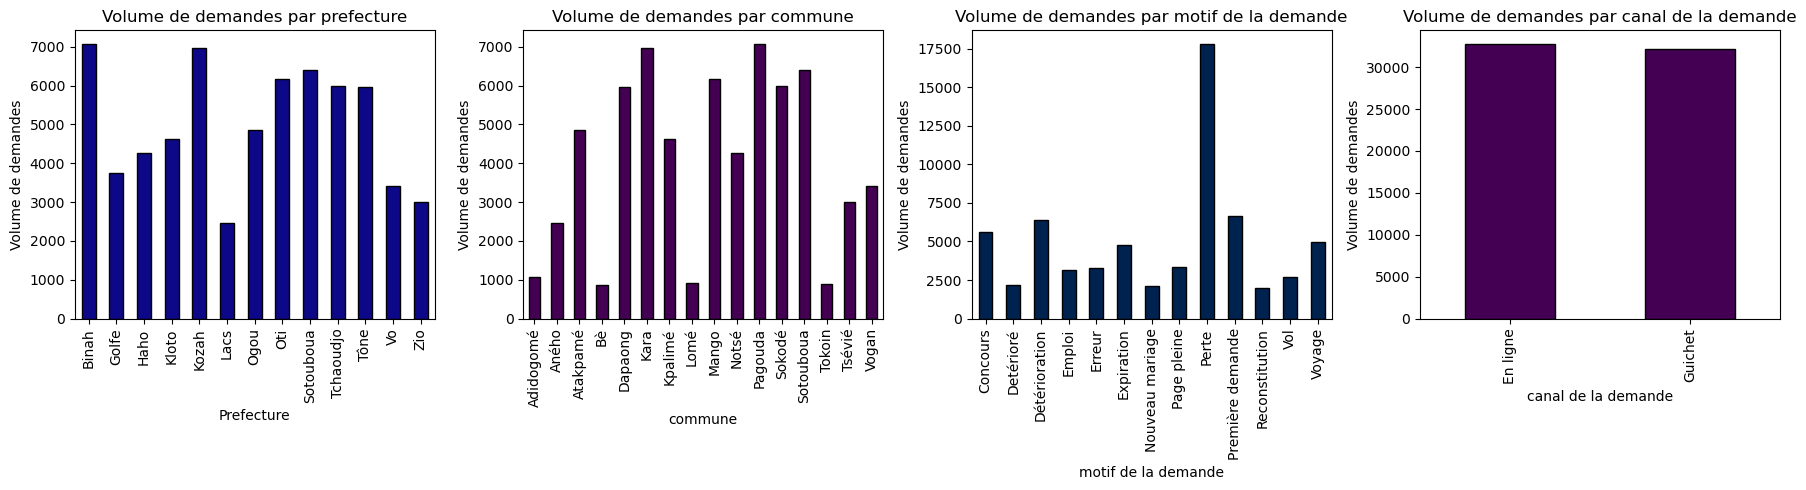

In [365]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 4, 1)
demandes_service_public.groupby("prefecture")["nombre_demandes"].sum().plot(kind="bar", colormap="plasma", edgecolor="black")
plt.xlabel("Prefecture")
plt.ylabel("Volume de demandes")
plt.title("Volume de demandes par prefecture")

plt.subplot(1, 4, 2)
demandes_service_public.groupby("commune")["nombre_demandes"].sum().plot(kind="bar", colormap="viridis", edgecolor="black")
plt.xlabel("commune")
plt.ylabel("Volume de demandes")
plt.title("Volume de demandes par commune")

plt.subplot(1, 4, 3)
demandes_service_public.groupby("motif_demande")["nombre_demandes"].sum().plot(kind="bar", colormap="cividis", edgecolor="black")
plt.xlabel("motif de la demande")
plt.ylabel("Volume de demandes")
plt.title("Volume de demandes par motif de la demande")

plt.subplot(1, 4, 4)
demandes_service_public.groupby("canal_demande")["nombre_demandes"].sum().plot(kind="bar", colormap="viridis", edgecolor="black")
plt.xlabel("canal de la demande")
plt.ylabel("Volume de demandes")
plt.title("Volume de demandes par canal de la demande")

plt.tight_layout()
plt.show()


In [366]:
demandes_service_public.describe()

,nombre_demandes,delai_traitement_jours,taux_rejet,age_demandeur
count,600.000000,600.000000,600.000000,600.000000
mean,108.173333,22.716667,0.073617,53.338333
std,56.186607,13.015070,0.043107,20.873509
min,10.000000,1.000000,0.000000,18.000000
25%,59.000000,12.000000,0.040000,36.000000
50%,110.000000,22.000000,0.070000,53.000000
75%,158.000000,34.000000,0.110000,70.000000
max,200.000000,45.000000,0.150000,90.000000


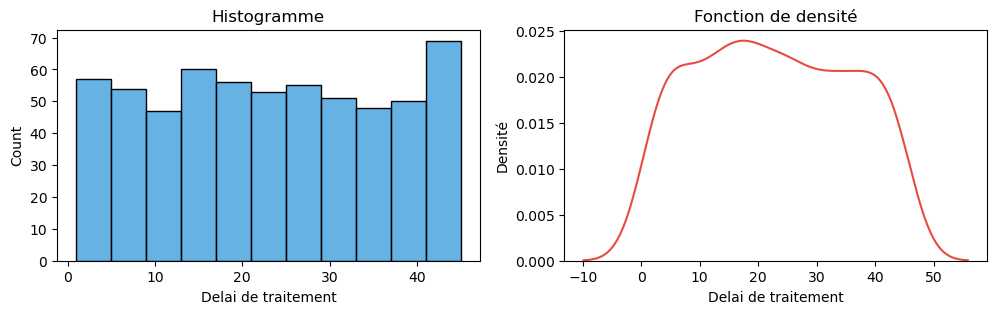

In [367]:
# @ Delai de traitement
# Histogramme 
plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
sns.histplot(demandes_service_public["delai_traitement_jours"], color="#3498db")
plt.xlabel("Delai de traitement")
plt.ylabel("Count")
plt.title("Histogramme")

# KDE
plt.subplot(1,2,2)
sns.kdeplot(demandes_service_public["delai_traitement_jours"], color="#e74c3c")
plt.xlabel("Delai de traitement")
plt.ylabel("Densité")
plt.title("Fonction de densité")
plt.show()


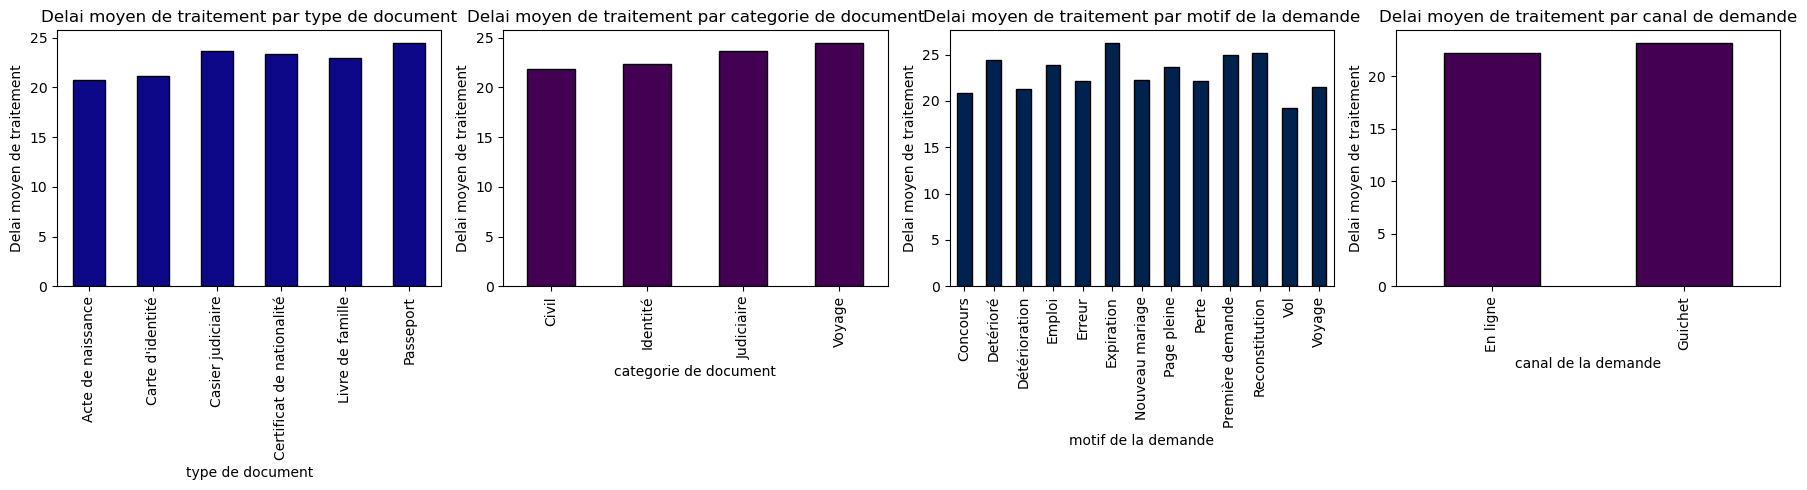

In [368]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 4, 1)
demandes_service_public.groupby("type_document")["delai_traitement_jours"].mean().plot(kind="bar", colormap="plasma", edgecolor="black")
plt.xlabel("type de document")
plt.ylabel("Delai moyen de traitement")
plt.title("Delai moyen de traitement par type de document")

plt.subplot(1, 4, 2)
demandes_service_public.groupby("categorie_document")["delai_traitement_jours"].mean().plot(kind="bar", colormap="viridis", edgecolor="black")
plt.xlabel("categorie de document")
plt.ylabel("Delai moyen de traitement")
plt.title("Delai moyen de traitement par categorie de document")

plt.subplot(1, 4, 3)
demandes_service_public.groupby("motif_demande")["delai_traitement_jours"].mean().plot(kind="bar", colormap="cividis", edgecolor="black")
plt.xlabel("motif de la demande")
plt.ylabel("Delai moyen de traitement")
plt.title("Delai moyen de traitement par motif de la demande")

plt.subplot(1, 4, 4)
demandes_service_public.groupby("canal_demande")["delai_traitement_jours"].mean().plot(kind="bar", colormap="viridis", edgecolor="black")
plt.xlabel("canal de la demande")
plt.ylabel("Delai moyen de traitement")
plt.title("Delai moyen de traitement par canal de demande")

plt.tight_layout()
plt.show()


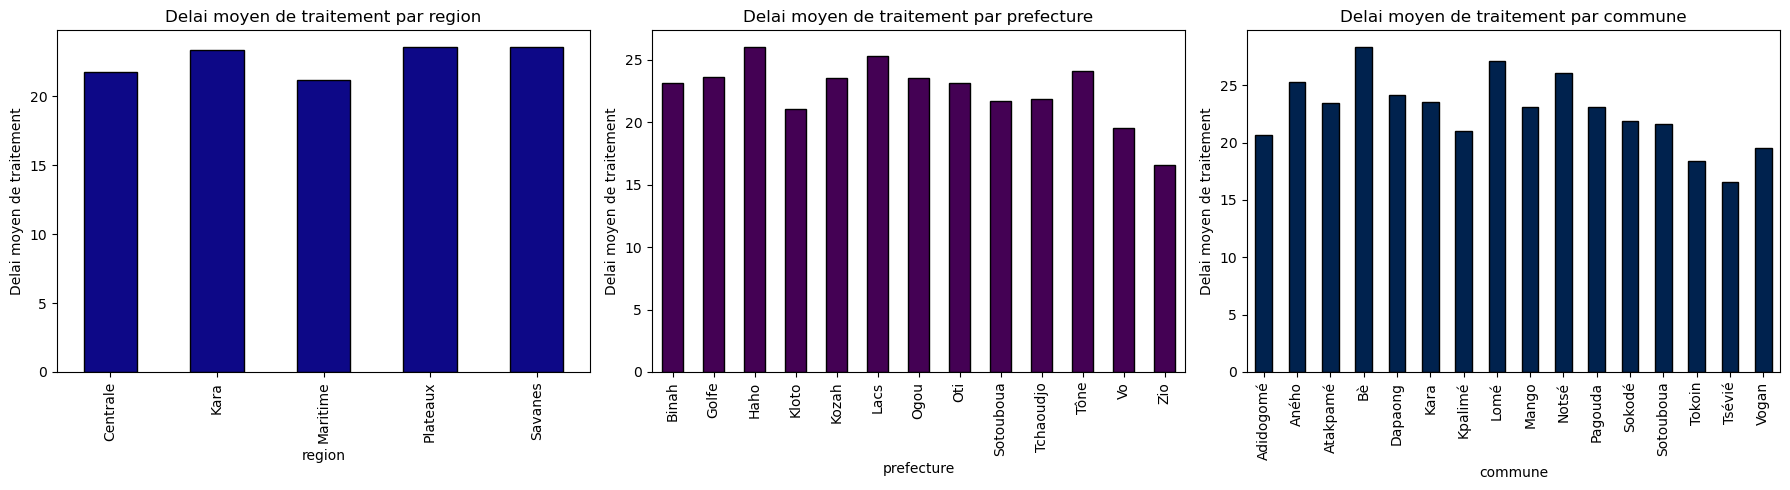

In [369]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
demandes_service_public.groupby("region")["delai_traitement_jours"].mean().plot(kind="bar", colormap="plasma", edgecolor="black")
plt.xlabel("region")
plt.ylabel("Delai moyen de traitement")
plt.title("Delai moyen de traitement par region")

plt.subplot(1, 3, 2)
demandes_service_public.groupby("prefecture")["delai_traitement_jours"].mean().plot(kind="bar", colormap="viridis", edgecolor="black")
plt.xlabel("prefecture")
plt.ylabel("Delai moyen de traitement")
plt.title("Delai moyen de traitement par prefecture")

plt.subplot(1, 3, 3)
demandes_service_public.groupby("commune")["delai_traitement_jours"].mean().plot(kind="bar", colormap="cividis", edgecolor="black")
plt.xlabel("commune")
plt.ylabel("Delai moyen de traitement")
plt.title("Delai moyen de traitement par commune")

plt.tight_layout()
plt.show()


In [371]:
logs_activite.head(2)

,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin
0,LOG001,CT015,2023-10-30,Traitement,Carte d'identité,241,41,31,Non éligible,15,58,Non,08:00,16:00
1,LOG002,CT026,2023-04-21,Maintenance,NaN,0,0,0,NaN,12,0,Non,09:00,19:00


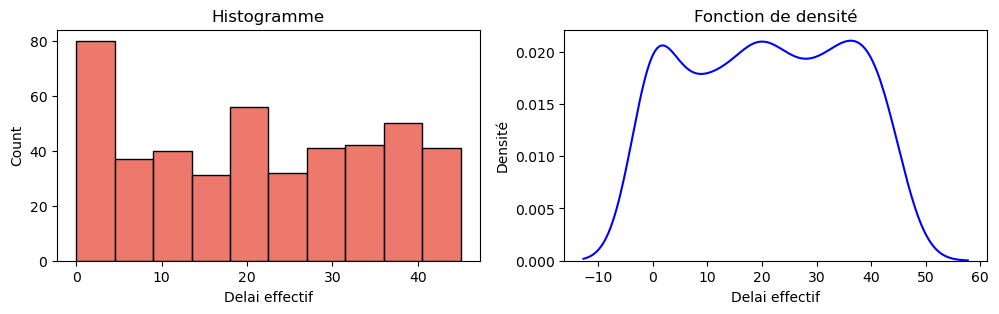

In [372]:
# @ Delai effectif
# Histogramme 
plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
sns.histplot(logs_activite["delai_effectif"], color="#e74c3c")
plt.xlabel("Delai effectif")
plt.ylabel("Count")
plt.title("Histogramme")

# KDE
plt.subplot(1,2,2)
sns.kdeplot(logs_activite["delai_effectif"], color="blue")
plt.xlabel("Delai effectif")
plt.ylabel("Densité")
plt.title("Fonction de densité")
plt.show()

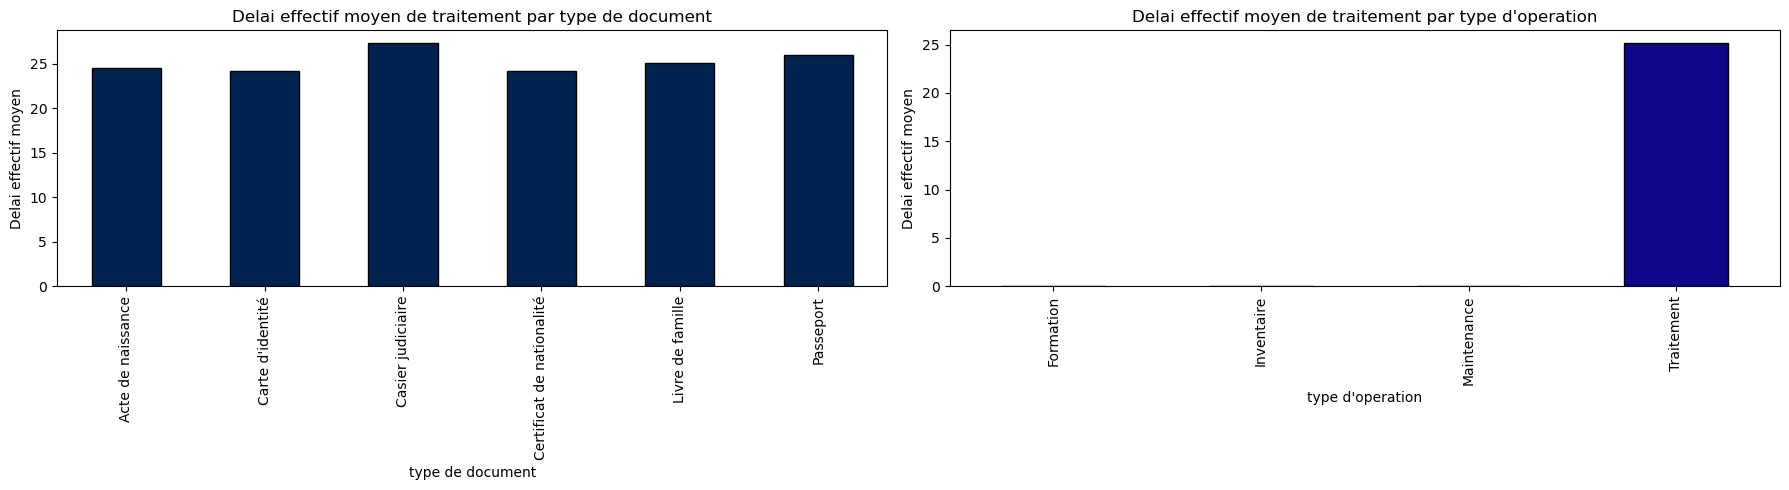

In [373]:
# Repartition du delai effectif en fonction de:
#  @ type de document 
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
logs_activite.groupby("type_document")["delai_effectif"].mean().plot(kind="bar", colormap="cividis", edgecolor="black")
plt.xlabel("type de document")
plt.ylabel("Delai effectif moyen")
plt.title("Delai effectif moyen de traitement par type de document")

#  @ type d'operation
plt.subplot(1, 2, 2)
logs_activite.groupby("type_operation")["delai_effectif"].mean().plot(kind="bar", colormap="plasma", edgecolor="black")
plt.xlabel("type d'operation")
plt.ylabel("Delai effectif moyen")
plt.title("Delai effectif moyen de traitement par type d'operation")

plt.tight_layout()
plt.show()


# SYNTHESE DES PRINCIPAUX CONSTATS
- Le volume de demandes de services publics diffère selon la nature du document sollicité. Les documents les plus demandés sont le livret de famille, suivi du certificat de nationalité. Les actes d’état civil et les documents d’identité figurent également parmi les catégories les plus sollicitées.
- Les communes de Kara, Pagouda, Sotouboua, Mango et Dapaong enregistrent un nombre de demandes supérieur à la moyenne, tandis que les communes de Bè, Lomé et Tokoin présentent des volumes nettement plus faibles.
Au niveau des préfectures, Binah et Kozah concentrent le plus grand nombre de demandes, contrairement à la préfecture des Lacs, qui affiche le volume le plus bas.
- Le nombre de demandes est plus élevé en 2023 qu’en 2024, traduisant une baisse d’activité ou de sollicitation au cours de la dernière année. De plus, la demande de services publics est équilibrée entre les hommes et les femmes, sans différence significative.
- Le nombre de personnel est globalement comparable entre les centres principaux et secondaires. Toutefois, le centre principal de Sokodé concentre le plus grand effectif, suivi des centres principaux de Kpalimé et Tsévié. Au niveau des préfectures, Tchaoudjo enregistre l’effectif le plus élevé, suivi de Kloto, Kozah, Golfe et Zio.
- Le motif le plus fréquent pour la demande de services publics est la perte de documents suivie de leur détérioration. 

# Nettoyage et Préparation des Données



In [374]:
bases_names

['centres_service',
 'demandes_service_public',
 'details_communes',
 'developpement',
 'documents_administratifs_ext',
 'donnees_socioeconomiques',
 'logs_activite',
 'reseau_routier_togo_ext']

In [375]:
# La base qui contient les donnees manquante est: logs_activite (type_document a 80 valeurs manquantes et raison_rejet en a 103)

In [376]:
logs_activite.isnull().sum()

log_id                           0
centre_id                        0
date_operation                   0
type_operation                   0
type_document                   80
nombre_traite                    0
delai_effectif                   0
nombre_rejete                    0
raison_rejet                   103
personnel_present                0
temps_attente_moyen_minutes      0
incident_technique               0
heure_debut                      0
heure_fin                        0
dtype: int64

In [377]:
# On remarque que les valeurs nulles de la variable type_document s'expliquent par le fait qu'il n'y a pas eu d'operation
# @ (car le nombre de document traité correspondant est nulle) par conséquent on peut supprimer ces lignes 
logs_activite[(logs_activite["type_document"].isnull())]

,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin
1,LOG002,CT026,2023-04-21,Maintenance,NaN,0,0,0,NaN,12,0,Non,09:00,19:00
7,LOG008,CT029,2023-12-05,Inventaire,NaN,0,0,0,NaN,4,0,Non,07:15,15:15
9,LOG010,CT011,2023-09-11,Inventaire,NaN,0,0,0,NaN,2,0,Non,09:30,19:30
11,LOG012,CT037,2023-09-26,Maintenance,NaN,0,0,0,NaN,7,0,Oui,08:45,16:45
41,LOG042,CT035,2023-12-31,Formation,NaN,0,0,0,NaN,5,0,Non,09:00,17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,LOG430,CT043,2023-12-28,Maintenance,NaN,0,0,0,NaN,9,0,Non,07:45,16:45
436,LOG437,CT004,2023-04-03,Formation,NaN,0,0,0,NaN,14,0,Oui,08:45,18:45
440,LOG441,CT033,2023-04-10,Maintenance,NaN,0,0,0,NaN,13,0,Non,07:00,17:00
442,LOG443,CT036,2023-07-23,Inventaire,NaN,0,0,0,NaN,8,0,Non,09:30,19:30


In [378]:
new_logs_activite = logs_activite.dropna(subset = ["type_document"])

In [379]:
new_logs_activite.isnull().sum()

log_id                          0
centre_id                       0
date_operation                  0
type_operation                  0
type_document                   0
nombre_traite                   0
delai_effectif                  0
nombre_rejete                   0
raison_rejet                   23
personnel_present               0
temps_attente_moyen_minutes     0
incident_technique              0
heure_debut                     0
heure_fin                       0
dtype: int64

In [380]:
new_logs_activite[(new_logs_activite["type_document"].isnull())]

,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin


In [381]:
new_logs_activite.head(2)

,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin
0,LOG001,CT015,2023-10-30,Traitement,Carte d'identité,241,41,31,Non éligible,15,58,Non,08:00,16:00
2,LOG003,CT049,2023-08-22,Traitement,Livre de famille,62,19,0,NaN,12,95,Non,08:30,17:30


In [382]:
new_logs_activite["raison_rejet"].isnull().sum()

23

In [383]:
new_logs_activite[new_logs_activite["raison_rejet"].isnull()]

,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin
2,LOG003,CT049,2023-08-22,Traitement,Livre de famille,62,19,0,NaN,12,95,Non,08:30,17:30
5,LOG006,CT052,2023-12-07,Traitement,Certificat de nationalité,20,40,0,NaN,8,95,Non,07:15,15:15
24,LOG025,CT034,2023-11-05,Traitement,Acte de naissance,54,17,0,NaN,6,13,Non,08:00,16:00
27,LOG028,CT032,2023-05-09,Traitement,Carte d'identité,38,18,0,NaN,11,73,Non,09:00,19:00
79,LOG080,CT033,2023-04-21,Traitement,Carte d'identité,26,7,0,NaN,4,36,Non,08:30,18:30
107,LOG108,CT014,2023-09-16,Traitement,Certificat de nationalité,42,8,0,NaN,12,116,Non,08:30,17:30
133,LOG134,CT005,2023-11-19,Traitement,Certificat de nationalité,37,18,0,NaN,2,18,Non,07:15,15:15
158,LOG159,CT026,2023-02-24,Traitement,Casier judiciaire,39,9,0,NaN,11,66,Non,09:15,18:15
159,LOG160,CT018,2023-04-20,Traitement,Acte de naissance,57,7,0,NaN,2,111,Oui,09:00,17:00
160,LOG161,CT023,2023-10-12,Traitement,Acte de naissance,39,26,0,NaN,2,76,Non,08:45,17:45


In [384]:
new_logs_activite[(new_logs_activite["raison_rejet"].isnull())&(new_logs_activite["nombre_rejete"]!=0)]

,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin


In [385]:
# @ Les obserevation precedentes montrent que la raison du rejet est NaN parce que le nombre de rejet correspondant est nulle, 
# @ ce qui implique qui'il n'y a pas eu de rejet. Sur-ce, nous allons remplacer ces NaN par "Non rejeté" 

new_logs_activite["raison_rejet"] = new_logs_activite["raison_rejet"].fillna("Non rejeté")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9924\4234036586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_logs_activite["raison_rejet"] = new_logs_activite["raison_rejet"].fillna("Non rejeté")


In [386]:
new_logs_activite.isnull().sum()

log_id                         0
centre_id                      0
date_operation                 0
type_operation                 0
type_document                  0
nombre_traite                  0
delai_effectif                 0
nombre_rejete                  0
raison_rejet                   0
personnel_present              0
temps_attente_moyen_minutes    0
incident_technique             0
heure_debut                    0
heure_fin                      0
dtype: int64

In [387]:
# HARMONISATION DES FORMATS:

In [388]:
# Nous allons changer le type de format des variables date_demande (demande_services_public), date_ouverture (centres_services),
# et date_operation (logs_activite)
demandes_service_public["date_demande"] = pd.to_datetime(demandes_service_public["date_demande"])
centres_service["date_ouverture"] = pd.to_datetime(centres_service["date_ouverture"])
new_logs_activite["date_operation"] = pd.to_datetime(new_logs_activite["date_operation"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9924\3517077883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_logs_activite["date_operation"] = pd.to_datetime(new_logs_activite["date_operation"])


In [389]:
centres_service.head(1)

,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
0,CT001,Centre Principal Dapaong,Principal,Savanes,Tône,Dapaong,Administratif,10.592,0.4742,300,12,07:30-17:30,Non,Complet,2016-02-14,Actif


In [390]:
# La colonne heures_ouverture de la base: centres_service contient l'heure de debut et de fin, ainsi pour harmoniser cela avec le reste de nos
# donnees, nous allons diviser cela en heure de debut et heure de fin.

centres_service[["heure_debut", "heure_fin"]] = centres_service["heures_ouverture"].str.split("-", expand=True)

In [391]:
centres_service.head(2)

,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre,heure_debut,heure_fin
0,CT001,Centre Principal Dapaong,Principal,Savanes,Tône,Dapaong,Administratif,10.5920,0.4742,300,12,07:30-17:30,Non,Complet,2016-02-14,Actif,07:30,17:30
1,CT002,Centre Kévé,Secondaire,Maritime,Ave,Kévé,Zone industrielle,6.2815,1.2182,63,2,08:00-16:00,Non,Limite,2020-09-14,Actif,08:00,16:00


In [392]:
# Je vais maintenat supprimer la colonne: heures_ouverture
centres_service.drop("heures_ouverture", axis=1, inplace=True)

In [393]:
bases_names

['centres_service',
 'demandes_service_public',
 'details_communes',
 'developpement',
 'documents_administratifs_ext',
 'donnees_socioeconomiques',
 'logs_activite',
 'reseau_routier_togo_ext']

In [394]:
# Maintenant il va falloir changer les format des variables suivantes en : 
# @ heure_debut et heure_fin (centres_service)
# @ heure_debut et heure_fin(new_logs_activite)

In [418]:
centres_service["heure_debut"] = pd.to_timedelta(centres_service["heure_debut"].astype(str))

centres_service["heure_fin"] = pd.to_timedelta(centres_service["heure_fin"].astype(str))

new_logs_activite["heure_debut"] = pd.to_timedelta(new_logs_activite["heure_debut"].astype(str))
new_logs_activite["heure_fin"] = pd.to_timedelta(new_logs_activite["heure_fin"].astype(str))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9924\897136916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_logs_activite["heure_debut"] = pd.to_timedelta(new_logs_activite["heure_debut"].astype(str))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9924\897136916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_logs_activite["heure_fin"] = pd.to_timedelta(new_logs_activite["heure_fin"].astype(str))


In [419]:
centres_service["heure_fin"] - centres_service["heure_debut"]

0    0 days 10:00:00
1    0 days 08:00:00
2    0 days 08:00:00
3    0 days 08:00:00
4    0 days 08:00:00
5    0 days 10:00:00
6    0 days 08:00:00
7    0 days 10:00:00
8    0 days 08:00:00
9    0 days 10:00:00
10   0 days 08:00:00
11   0 days 08:00:00
12   0 days 08:00:00
13   0 days 08:00:00
14   0 days 08:00:00
15   0 days 08:00:00
16   0 days 08:00:00
17   0 days 08:00:00
18   0 days 08:00:00
19   0 days 08:00:00
20   0 days 08:00:00
21   0 days 10:00:00
22   0 days 08:00:00
23   0 days 08:00:00
24   0 days 08:00:00
25   0 days 10:00:00
26   0 days 08:00:00
27   0 days 08:00:00
28   0 days 10:00:00
29   0 days 08:00:00
30   0 days 08:00:00
31   0 days 08:00:00
32   0 days 08:00:00
33   0 days 08:00:00
34   0 days 10:00:00
35   0 days 10:00:00
36   0 days 10:00:00
37   0 days 08:00:00
38   0 days 08:00:00
39   0 days 08:00:00
40   0 days 08:00:00
41   0 days 10:00:00
42   0 days 08:00:00
43   0 days 08:00:00
44   0 days 08:00:00
45   0 days 08:00:00
46   0 days 08:00:00
47   0 days 0

In [420]:
new_logs_activite.dtypes

log_id                                  object
centre_id                               object
date_operation                  datetime64[ns]
type_operation                          object
type_document                           object
nombre_traite                            int64
delai_effectif                           int64
nombre_rejete                            int64
raison_rejet                            object
personnel_present                        int64
temps_attente_moyen_minutes              int64
incident_technique                      object
heure_debut                    timedelta64[ns]
heure_fin                      timedelta64[ns]
dtype: object

In [432]:
bases_names

['centres_service',
 'demandes_service_public',
 'details_communes',
 'developpement',
 'documents_administratifs_ext',
 'donnees_socioeconomiques',
 'logs_activite',
 'reseau_routier_togo_ext']

In [435]:
 # Les donnees clean sont donc:
clean_documents_administratifs_ext = documents_administratifs_ext.copy()
clean_donnees_socioeconomiques = donnees_socioeconomiques.copy()
clean_demandes_service_public = demandes_service_public.copy()
clean_reseau_routier_togo_ext = reseau_routier_togo_ext.copy()
clean_details_communes = details_communes.copy()
clean_centres_service = centres_service.copy()
clean_logs_activite = new_logs_activite.copy()
clean_developpement = developpement.copy()

In [437]:
clean_documents_administratifs_ext.to_csv("togo_documents_administratifs_ext.csv", index=False)
clean_donnees_socioeconomiques.to_csv("togo_donnees_socioeconomiques.csv", index=False)
clean_demandes_service_public.to_csv("togo_demandes_service_public.csv", index=False)
clean_reseau_routier_togo_ext.to_csv("togo_reseau_routier_togo_ext.csv", index=False)
clean_details_communes.to_csv("togo_details_communes.csv", index=False)
clean_centres_service.to_csv("togo_centres_service.csv", index=False)
clean_logs_activite.to_csv("togo_logs_activite.csv", index=False)
clean_developpement.to_csv("togo_developpement.csv", index=False)